<a href="https://colab.research.google.com/github/vidhya2324/Machine_learning_starting_project/blob/main/medical_insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Medical insurance predicton

In [1]:
#import neccessary prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Data collection and processing

In [2]:
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 9.24MB/s]


In [3]:
!unzip \*.zip && rm *.zip

Archive:  insurance.zip
  inflating: insurance.csv           


In [6]:
insurance_data=pd.read_csv("/content/insurance.csv")

In [7]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
insurance_data.shape

(1338, 7)

#preprocessing

In [12]:
#convert the categorical into numerical values
insurance_data["sex"].value_counts()

,count
sex,
male,676
female,662


In [14]:
insurance_data["smoker"].value_counts()

,count
smoker,
no,1064
yes,274


In [15]:
insurance_data["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [19]:
#Encoding the categorical columns
insurance_data=insurance_data.replace({'sex':{'male':0,'female':1}})
insurance_data=insurance_data.replace({'smoker':{'yes':1,'no':0}})
insurance_data=insurance_data.replace({'region':{'southeast':1,'southwest':2,'northwest':3,'northeast':4}})


In [20]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


#spliting training and testing

In [21]:
x=insurance_data.drop(columns="charges",axis=1)
y=insurance_data['charges']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(1070, 6) (268, 6) (1070,) (268,)


#model building

In [23]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [25]:
from sklearn import metrics
train_data_prediction=model.predict(x_train)
error_score=metrics.r2_score(y_train,train_data_prediction)
print("RMSE ",error_score)

RMSE  0.7427512490800663


In [26]:
test_data_prediction=model.predict(x_test)
error_score=metrics.r2_score(y_test,test_data_prediction)
print("RMSE ",error_score)

RMSE  0.779488481904272


#visualization

<ipython-input-31-eefbc0cdecf3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


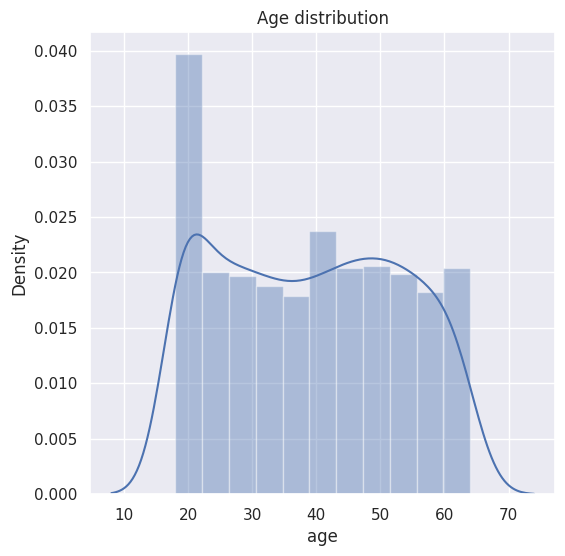

In [31]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'])
plt.title("Age distribution")
plt.show()

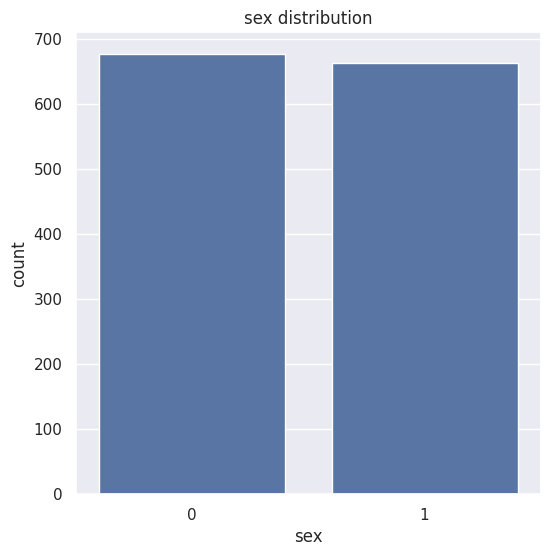

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_data)
plt.title("sex distribution")
plt.show()

<ipython-input-34-316ece28e20a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


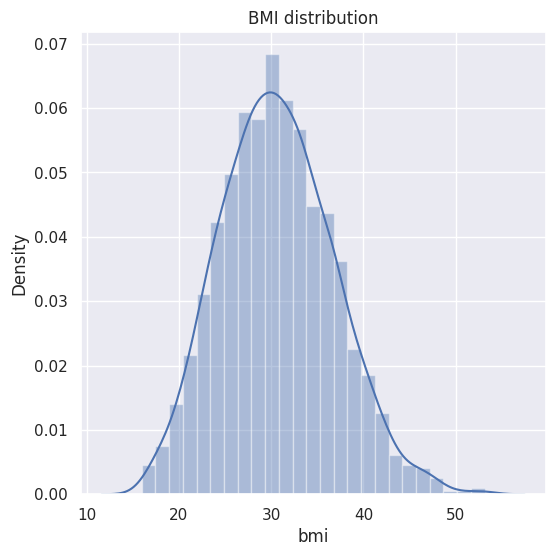

In [34]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'])
plt.title("BMI distribution")
plt.show()

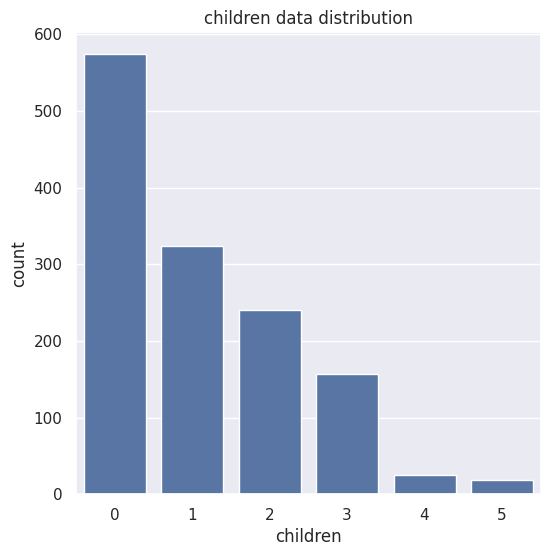

In [35]:
#children columns
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title("children data distribution")
plt.show()

In [36]:
insurance_data['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


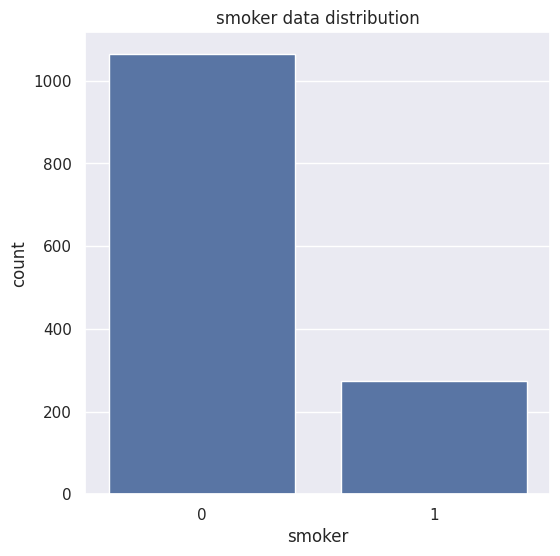

In [37]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_data)
plt.title("smoker data distribution")
plt.show()

In [39]:
correlation=insurance_data.corr()

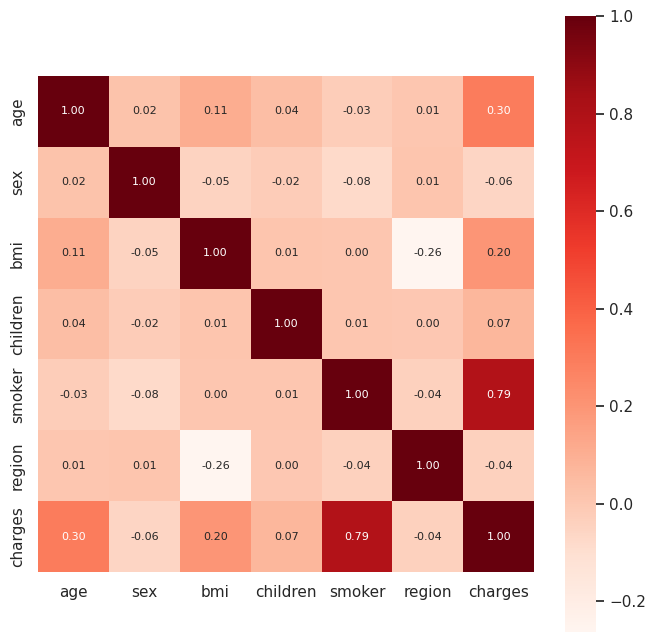

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Reds')
plt.show()

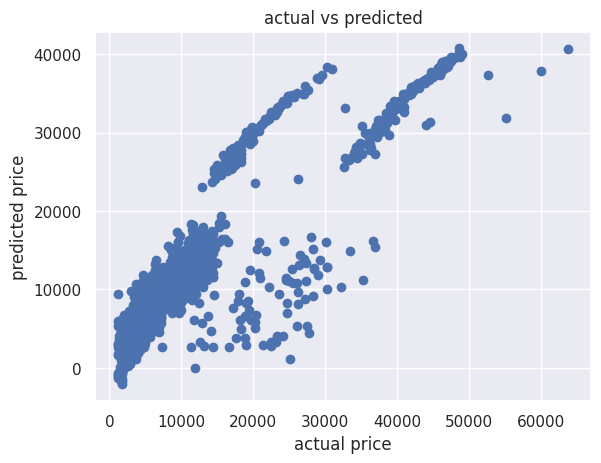

In [43]:
plt.scatter(y_train,train_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted")
plt.show()


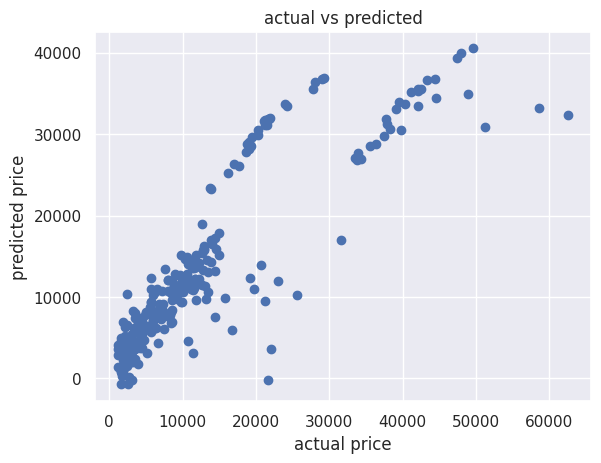

In [44]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted")
plt.show()

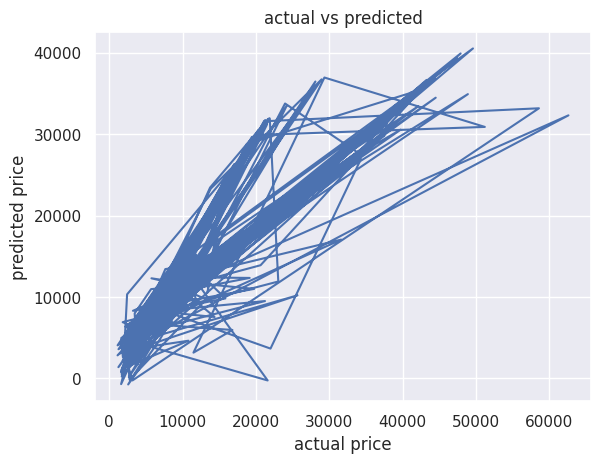

In [46]:
plt.plot(y_test,test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted")
plt.show()

Building a Predictive System

In [28]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[27064.01120296]
The insurance cost is USD  27064.0112029603


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
